# Cepstrum Coefficients

In this session we will study homomorphic filtering with Python. Specifically,
we will work with the cepstrum coefficients, for a file that contains  vowels

# Exercises

A. Cepstrum Coefficients
In this first part we will follow the steps to calculate the cepstrum:


\begin{equation}
c[n] = \frac{1}{2\pi} \int\limits_{-\pi}^{\pi}log|X(e^{j\omega}|e^{j\omega n}d\omega
\end{equation}



and that, for each frame, we can summarize its calculation as:

* Windowing of the speech segment
* DFT + calculate the magnitude of the spectrum,
* Logarithm + IDFT.

Once the cepstrum coefficients are calculated, we can separate the part
corresponding to the vocal tract (filter) from the impulse train (source). You can
read an intuitive explanation in the following text:

Alan V. Oppenheim, Speech Analysis-Synthesis System Based on Homomorphic Filtering, Journal
of the Acoustic Society of America, Vol 45, No.2, 458-465, Feb. 1969

In [1]:
# to use this notebook with colab uncomment the next line
#!git clone https://github.com/MTG/sms-tools.git
# and change the next line to sys.path.append('sms-tools/software/models/')
import sys
sys.path.append('sms-tools/software/models/')

In [2]:
import sys
import os
import numpy as np
import scipy
from scipy.io.wavfile import read

sys.path.append('../software/models/')
from utilFunctions import wavread, wavwrite
from scipy.signal import get_window
import matplotlib.pyplot as plt
from scipy.signal import get_window
from scipy.fftpack import fft, fftshift, ifft

A.1 Cepstrum coefficients computation
Use the "a.wav" file to calculate the coefficients. Follow the steps below:
* Load the voice file, "y", and the sampling frequency, "fs",
* Normalize multiplying by 0.99/max(abs(y)),
* We will work with a 100ms long frame
* P1. How many N samples does the 100ms signal segment correspond
to?
* Take the N samples corresponding to a frame of 100ms (from sample 512
to 512 + N-1).
* Window the samples with a Hanning window of the same length. You can
make a plot as a function of time to make sure you are taking a segment of
the appropriate length.
* Calculate the FFT,
* Calculate the logarithm of the magnitude of the spectrum,
* Calculate the IFFT to obtain the cepstrum coefficients.
* P2. Which is the right Python expression for the computation of the
cepstral coefficients?

ValueError: x and y must have same first dimension, but have shapes (512,) and (1,)

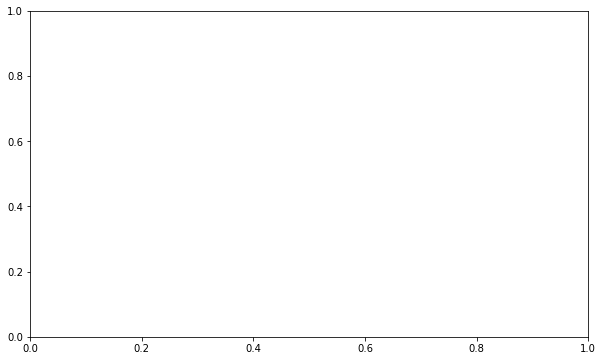

In [11]:
# Your code here
# Use scipy.io.wavfile.read() to read wav file
fs = 44100
tt = np.linspace(0,512,512)
#normalize
y = np.cos(2*np.pi*4166)
#frame = 100ms
frame = 0.1

N = int(fs*frame) #samples: 1600
frame_y = y[512:512+N-1] #1599
M = len(frame_y)

w = get_window('hanning',M)

#windowed frame
yw = frame_y*w

#fft buffer
hM1 = int(np.floor((M+1)/2))
hM2 = int(np.floor(M/2))
dftbuffer = np.zeros(M)
dftbuffer[:hM1] = yw[hM2:]                              
dftbuffer[-hM2:] = yw[:hM2]
    
X = fft(dftbuffer)
Xm = abs(X)

#fft
Y = fft(yw)
Ym = abs(Y)

Yml = np.log(Ym)
Xml = np.log(Xm)

cy = ifft(Yml)
cx = ifft(Xml)






tt1 = np.linspace(0,len(y)/fs,len(y))
tt2 = np.linspace(0,len(frame_y)/fs,len(frame_y)) # time of x2 given sample rate is 512
# PLOT y
plt.figure(figsize = (10, 6))
plt.plot(tt,y)
plt.title("Signal y", fontsize=15)
plt.xlabel('time')
plt.ylabel('A')
plt.show()

# PLOT frame y
plt.figure(figsize = (10, 6))
plt.plot(tt2,frame_y)
plt.title("fame y", fontsize=15)
plt.xlabel('time')
plt.ylabel('A')
plt.show()

# PLOT frame y windowed
plt.figure(figsize = (10, 6))
plt.plot(tt2,yw)
plt.title("y frame windowed", fontsize=15)
plt.xlabel('time')
plt.ylabel('A')
plt.show()

# PLOT magnitude spectrum
plt.figure(figsize = (10, 6))
plt.plot(Xm[:len(Xm)//2])
plt.title("magnitude spectrum", fontsize=15)
plt.xlabel('time')
plt.ylabel('A')
plt.show()

# PLOT cx
plt.figure(figsize = (10, 6))
plt.plot(tt2,cx)
plt.title("y frame windowed", fontsize=15)
plt.xlabel('time')
plt.ylabel('A')
plt.show()

# PLOT cy
plt.figure(figsize = (10, 6))
plt.plot(tt2,cy)
plt.title("y frame windowed", fontsize=15)
plt.xlabel('time')
plt.ylabel('A')
plt.show()

A.2 Cepstrum coefficients observation
The first coefficient is likely to be very large compared to the rest. When you do
the plot of P3, just set it to 0 (for the plot only) or zoom in to better observe the
values of the rest of the coefficients.
* P3. Make the plot of the first half of the coefficients: plot (abs (..)).
Does it correspond to a voiced phoneme?

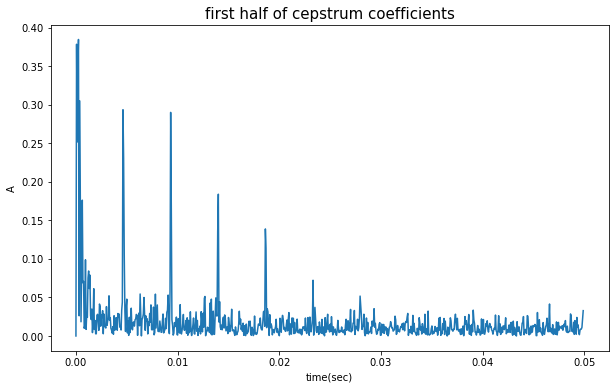

In [4]:
# Your code here

# PLOT cy
cy[0]=0#set the fisrt coef to 0 to better visualize the plot

plt.figure(figsize = (10, 6))
plt.plot(tt2[:len(tt2)//2],abs(cy[:len(cy)//2]))
plt.title("first half of cepstrum coefficients", fontsize=15)
plt.xlabel('time(sec)')
plt.ylabel('A')
plt.show()

print('')

A.3 Liftering

The term "liftering" refers to the filtering in the domain of the cepstrum to
separately observe the frequency response of the vocal tract filter from the
excitation signal:

• P4. What could we calculate from the spectrum of vocal tract? And
what can we calculate from the parameters of the excitation signal?

To filter the low coefficients (low-pass liftering):

• Make a plot of the log of the linear magnitude of the original
spectrum. Remember to take half of the spectrum since the spectrum is symmetric.  

* Copy the coefficients computed in A.1 to another vector (Use only half of the cepstrum since it is symmetric). Filter the first 20 coefficients (Do this by multiplying it with another vector of 1 values). Compute a linear magnitude of the spectrum (FFT). Remember to use correct FFT size. 
 

* P5. Which is the right Python expression for the computation of the
low pass liftered spectrum?


• Repeat the last 2 steps with 40 and 5 coefficients, obtaining 1 single plot
with the 4 curves obtained from 20, 40 and 5 coefficients plus the original
one.

• P6. To which spectrum does each curve correspond to?

To filter the high coefficients (high-pass liftering):

• Load half of the coefficients in section A.1, setting the first 20 coefficients
to 0.

• P7. Which is the right Python expression for the computation of the
position of the maximum position in the high pass liftered cepstrum?

• P8. To what frequency corresponds? To convert from ceptrum to
frecuency, apply (to the position found in section P7) the same operation
applied when converting from samples to time. What varies is the
interpretation, where what we will get will be the fundamental period of
the signal.

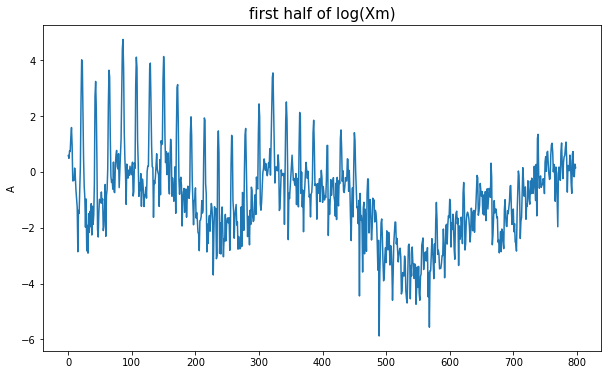

/Users/pau/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


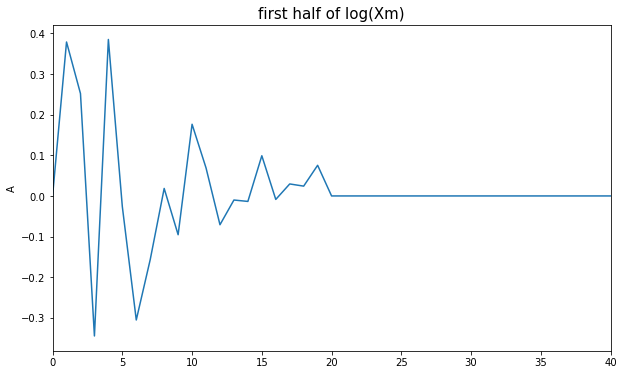

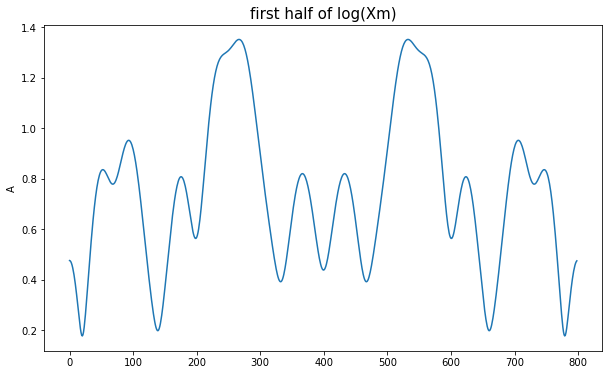

In [8]:
#Your code here
#P4 
#plot of log(Xm[:len//2])
plt.figure(figsize = (10, 6))
plt.plot(np.log(Xm[:len(Xm)//2]))
plt.title("first half of log(Xm)", fontsize=15)
plt.xlabel('')
plt.ylabel('A')
plt.show()

#c[:20]
c_low = cy[:len(cy)//2]
#c*algo(low pass)
vec1 = np.ones(20)
vec2 = np.zeros(len(c_low)-20)
vec = np.append(vec1,vec2)
c_low = c_low * vec

#fft(that)
C = fft(c_low)

plt.figure(figsize = (10, 6))
plt.plot(c_low)
plt.title("first half of log(Xm)", fontsize=15)
plt.xlim(0,40)
plt.xlabel('')
plt.ylabel('A')
plt.show()


plt.figure(figsize = (10, 6))
plt.plot(abs(C))
plt.title("first half of log(Xm)", fontsize=15)
plt.xlabel('')
plt.ylabel('A')
plt.show()
